In [98]:

import pandas as pd
import numpy as np
import requests
import tweepy
import json
from bs4 import BeautifulSoup
import csv
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt

## Gather

Three pieces of data are required for this analysis:

twitter-archive-enhanced.csv - a csv file containing elements of the We Rate Dogs Twitter archive; this file can be uploaded directly

img_pred.csv - a file containing predictions of dog breed from the images associated with the Tweets in the archive file; this file will be uploaded using the Requests library

Additional information from the Twitter archive, orignially named faves, gathered by accessing Twitter with a key, a token, and a Tweepy authorization 
    

In [99]:
#Upload Twitter archive file
archive = pd.read_csv('twitter-archive-enhanced (2).csv')

In [100]:
#Save as csv file.
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
  
with open(r'img_pred.csv', 'wb') as f:
    f.write(r.content)

In [101]:
#Read image predictions into pandas dataframe
pred = pd.read_csv('img_pred.csv', sep = "\t")

In [ ]:
#Access Twitter files.
consumer_key = *****
consumer_secret = *****
access_token = *****
access_token_secret = *****

In [ ]:
# Use auth from Tweepy to access Twitter files.
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
#Set to pause wait on rate limit during extraction.
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
#Gather tweet information from We Rate Dogs using tweet ids from the twitter archive file
count = 0
fails_dict = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in archive['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass       
     
          

In [102]:
#Pull tweets into list
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))    

In [103]:
#Create dataframe with tweet information exported from Twitter
faves = pd.DataFrame.from_dict(status)

## Assess

Look at the structure and contents of the data.

In [104]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [105]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [106]:
faves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2334 non-null object
display_text_range               2334 non-null object
entities                         2334 non-null object
extended_entities                2062 non-null object
favorite_count                   2334 non-null int64
favorited                        2334 non-null bool
full_text                        2334 non-null object
geo                              0 non-null object
id                               2334 non-null int64
id_str                           2334 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [107]:
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [108]:
pred.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [109]:
faves.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",37362,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,...,NaN,NaN,NaN,NaN,8037,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8218043, 'friends_count': 12, 'listed_count': 6285, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 142525, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 10493, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1112594177961844736/qQK8NJT-_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1112594177961844736/qQK8NJT-_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1562002967', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'h

In [110]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [111]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [112]:
pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [113]:
pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
Staffordshire_bullterrier    20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
Maltese_dog                  18 
beagle                       18 
Eskimo_dog                   18 
Shetland_sheepdog            18 
teddy                        18 
Lakeland_terrier             17 
Shih-Tzu                     17 
Rottweiler                   17 
kuvasz                       16 
Italian_greyhound            16 
          

In [114]:
faves.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2334.000000,2.334000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2334.000000
mean,7786.652956,7.419439e+17,7.440692e+17,2.040329e+16,8.113972e+17,2825.503856
std,12082.179867,6.819580e+16,7.524295e+16,1.260797e+17,6.295843e+16,4781.668014
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1353.500000,6.782926e+17,6.757073e+17,3.589728e+08,7.761338e+17,568.250000
50%,3391.500000,7.184574e+17,7.032559e+17,4.196984e+09,8.281173e+17,1322.500000
75%,9558.250000,7.986600e+17,8.233264e+17,4.196984e+09,8.637581e+17,3297.500000
max,161348.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,81174.000000


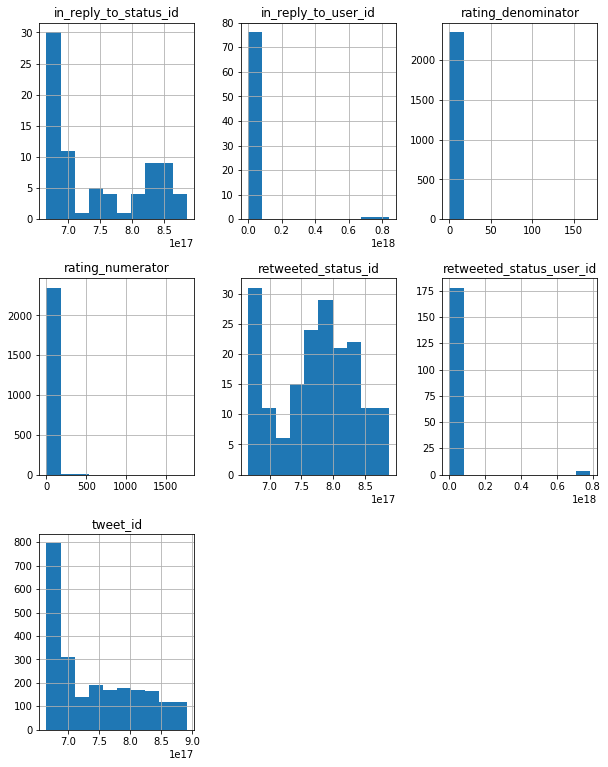

In [115]:
#A look at the data in the archive table does not show anything surprising. The rating numerator and denominator are the data.
#The other variables are tweet ids.
archive.hist(figsize = (10, 13));

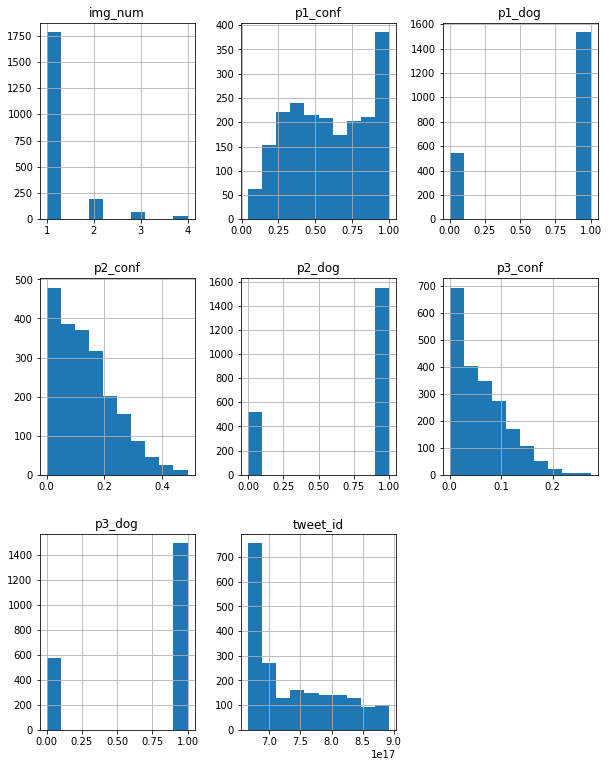

In [116]:
pred.hist(figsize = (10, 13));
#The information of interest in this dataframe is the predicition of the breed of dog in the picture, p1_dog.

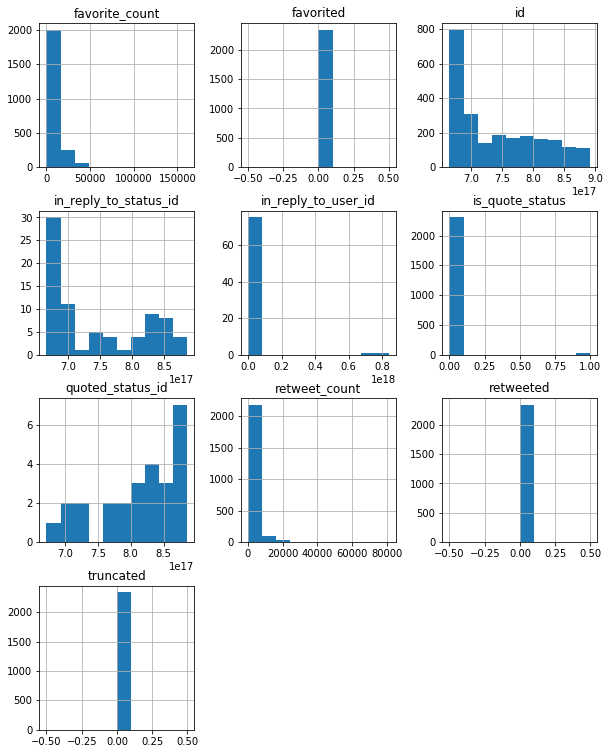

In [117]:
#Of interest are favorite and retweet counts.
faves.hist(figsize = (10, 13));

In [118]:
faves.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07    2 
7.305050e+17    1 
2.281182e+09    1 
3.105441e+09    1 
2.918590e+08    1 
3.589728e+08    1 
2.319108e+09    1 
1.806710e+08    1 
3.058208e+07    1 
2.625958e+07    1 
1.943518e+08    1 
8.405479e+17    1 
2.894131e+09    1 
2.916630e+07    1 
2.143566e+07    1 
1.648776e+07    1 
4.717297e+09    1 
2.878549e+07    1 
1.582854e+09    1 
4.670367e+08    1 
4.738443e+07    1 
1.361572e+07    1 
1.584641e+07    1 
2.068372e+07    1 
1.637468e+07    1 
1.185634e+07    1 
1.198989e+09    1 
1.132119e+08    1 
7.759620e+07    1 
Name: in_reply_to_user_id, dtype: int64

In [119]:
#Create datafrome using columns from the data gathered from Twitter.
newdf = faves[['id', 'favorite_count', 'retweet_count']]

In [120]:
newdf.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,37362,8037


In [121]:
#Copy files so original can be preserved while the copy is cleaned.
archive_clean = archive.copy()
pred_clean = pred.copy()
newdf_clean = newdf.copy()

## Cleaning

    Tidiness
    
    archive table
        Combine the type of dog (doggo, floofer, pupper, puppo) into one column
        Join with newdf table so all similar data is in the same table
    
    Quality
    
    archive table
        Ratings denominators should all be '10'
        Correct values in the ratings_numerator column to be consistent with the actual rating contained in the tweet 
        Change type_of_dog column from object to category
        Remove rows corresponding to retweets
        Drop unnecessary columns
        Join with newdf table
        
    pred table
        Remove prediction information for predictions in p1 column that are not actually types of dogs
        Add the rating_numerator column
        Remove rows for which rating_numerator is NaN
        Change breed of dog in p1 from object to category
        
        
    newdf table   
        Change column name from 'id' to 'tweet_id' to match archive table
               

In [122]:
#Look to see where the ratings are in the text string so the numerator can be extracted.
pd.set_option('display.max_colwidth', -1)
archive_clean.text

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

##### archive: Some of the numerator values are incorrect.

    Extract numerator values from Twitter text.
    Replace numerator values with newly extracted values.
    Change numerator values to floats.

##### Code

In [123]:
ratings = archive_clean.text.str.extract('((?:\d+)?\d+)\/(\d+)', expand=True)

In [124]:
archive_clean.loc[:, 'rating_numerator'] = ratings[0]

In [125]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype('float')

##### Test

In [126]:
#Test
archive_clean.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0       55 
14.0      54 
5.0       37 
6.0       32 
3.0       19 
4.0       17 
1.0       9  
2.0       9  
75.0      2  
15.0      2  
420.0     2  
0.0       2  
144.0     1  
666.0     1  
121.0     1  
182.0     1  
165.0     1  
17.0      1  
45.0      1  
204.0     1  
960.0     1  
1776.0    1  
84.0      1  
24.0      1  
27.0      1  
88.0      1  
99.0      1  
50.0      1  
80.0      1  
60.0      1  
44.0      1  
20.0      1  
26.0      1  
143.0     1  
Name: rating_numerator, dtype: int64

##### archive: change name data type to category.

##### Code

In [127]:
archive_clean.name = archive_clean.name.astype('category')

##### Test

In [128]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null category
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), float64

In [129]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None


##### archive: Drop columns that will not be used in this analysis.

##### Code

In [130]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'retweeted_status_user_id', 
                   'retweeted_status_timestamp', 'expanded_urls'], axis = 1, inplace = True)

##### Test

In [131]:
archive_clean.head(1)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13.0,10,Phineas,None,None,None,None


##### archive: Combine doggo, floofer, pupper, and puppo columns into one column.
    Remove the word "None" in all four columns
    Add the columns into a column named 'dog_type'
    Drop doggo, floofer, pupper, and puppo columns
    Replace empty cells with the word "None"
    Change data type of 'dog_typ' to category    

##### Code

In [132]:
#Replace the word 'None' in the doggo, floofer, pupper, and puppo columns so that the columns can be combined easily using
#df.replace().
archive_clean.doggo = archive_clean.doggo.replace('None', ' ')
archive_clean.floofer = archive_clean.floofer.replace('None', ' ')
archive_clean.pupper = archive_clean.pupper.replace('None', ' ')
archive_clean.puppo = archive_clean.puppo.replace('None', ' ')

In [133]:
#Combine doggo, floofer, pupper, and puppo columns into dog_type column.
archive_clean['dog_type'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']


In [134]:
#Drop doggo, floofer, pupper, and puppo columns using df.drop.
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [135]:
#Replace empty cells with 'None' using df.replace.
archive_clean = archive_clean.replace('    ', 'None')

In [136]:
#Change dog_type data type to category using df.astype().
archive_clean.dog_type = archive_clean.dog_type.astype('category')

##### Test

In [137]:
archive_clean.head(1)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13.0,10,Phineas,None


In [138]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id               2356 non-null int64
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null float64
rating_denominator     2356 non-null int64
name                   2356 non-null category
dog_type               2356 non-null category
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 146.9+ KB


In [139]:
archive_clean.dog_type.value_counts()

None              1976
  pupper          245 
doggo             83  
   puppo          29  
doggo pupper      12  
 floofer          9   
doggofloofer      1   
doggo  puppo      1   
Name: dog_type, dtype: int64

##### archive: Drop retweets from table

##### Code

In [140]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

##### Test

In [141]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id               2175 non-null int64
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null float64
rating_denominator     2175 non-null int64
name                   2175 non-null category
dog_type               2175 non-null category
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 156.2+ KB


In [142]:
#Check number of rows after dropping retweets.
2356 - 181

2175

In [143]:
pred_clean.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

##### predictions (pred): Change the image predictions to data type 'category'.

##### Code

In [144]:
#Change breed predictions to category instead of object.
pred_clean.p1 = pred_clean.p1.astype('category')
pred_clean.p2 = pred_clean.p2.astype('category')
pred_clean.p3 = pred_clean.p3.astype('category')

##### Test

In [145]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


In [146]:
newdf_clean.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,37362,8037


In [147]:
newdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
id                2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


##### newdf: Change column name from 'id' to 'tweet_id' to match the column name in the archive table.

##### Code

In [148]:
newdf_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

##### Test

In [149]:
newdf_clean.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37362,8037


##### newdf: Merge newdf table with archive table

##### Code

In [150]:
archive_clean = pd.merge(archive_clean, newdf_clean, how = 'inner', on = 'tweet_id')
archive_clean.drop(['retweeted_status_id'], axis = 1, inplace = True)

##### Test

In [151]:
archive_clean.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,37362,8037


In [152]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2168
Data columns (total 8 columns):
tweet_id              2169 non-null int64
text                  2169 non-null object
rating_numerator      2169 non-null float64
rating_denominator    2169 non-null int64
name                  2169 non-null category
dog_type              2169 non-null category
favorite_count        2169 non-null int64
retweet_count         2169 non-null int64
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 172.8+ KB


In [153]:
archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.169000e+03,2169.000000,2169.000000,2169.000000,2169.000000
mean,7.369383e+17,13.217612,10.494237,8378.998617,2551.597971
std,6.740227e+16,47.791634,7.028742,12333.837532,4540.414620
min,6.660209e+17,0.000000,0.000000,51.000000,1.000000
25%,6.768197e+17,10.000000,10.000000,1785.000000,551.000000
50%,7.095570e+17,11.000000,10.000000,3772.000000,1221.000000
75%,7.891380e+17,12.000000,10.000000,10420.000000,2899.000000
max,8.924206e+17,1776.000000,170.000000,161348.000000,81174.000000


In [154]:
pred_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


##### pred: Drop 'jpg_url' and 'img_num' columns.

##### Code

In [155]:
pred_clean.drop(['jpg_url','img_num'], axis = 1, inplace = True)

##### Test

In [156]:
#Test
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1)
memory usage: 142.5 KB


##### pred: Merge with archive table so all relevant information is in the same place.

##### Code

In [158]:
archive_clean = pd.merge(archive_clean, pred_clean, how = 'inner', on = 'tweet_id')

##### Test

In [159]:
archive_clean.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,37362,8037,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


## Analyze

Use the data to draw conclusions about We Rate Dogs.

##### Plot relationship between rating_numerator and retweet_count.
    Use basic plot to view all of the data
    Change axes to get a better view
    Calculate correlation coeffient and p-value
    
    The plot shows that the majority of the ratings fall in the 10 - 14 range, with the rating of 13 seeing the most 
    retweets. There are very few retweets for ratings higher than 14.
    
    The correlation coefficient is close to zero, indicating that correlation between rating and retweet count is low.

##### Code

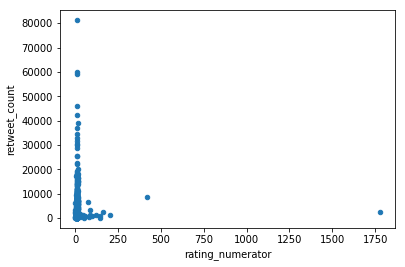

In [160]:
archive_clean.plot(x='rating_numerator', y='retweet_count', kind='scatter')

<function matplotlib.pyplot.show(*args, **kw)>

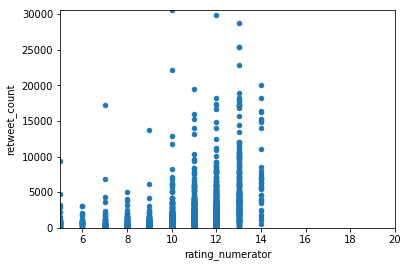

In [161]:
archive_clean.plot(x='rating_numerator', y='retweet_count', kind='scatter')
plt.axis([5, 20, 0, 30500])
plt.show

In [162]:
from scipy.stats import pearsonr

In [163]:
corr1 = corr, _ = pearsonr(archive_clean.rating_numerator, archive_clean.retweet_count)
print(corr1)

(0.0181530993112013, 0.41854407625937173)


##### Plot relationship between rating_numerator and favorite_count.
    Use basic plot to view all of the data
    Change axes to get a better view
    Calculate correlation coeffient and p-value
    
    The plot shows that the majority of the ratings fall in the 10 - 14 range, with the rating of 13 seeing the most 
    retweets. There are very few retweets for ratings higher than 14.
    
    The correlation coefficient is close to zero, indicating that correlation between rating and favorite count is low.

##### Code

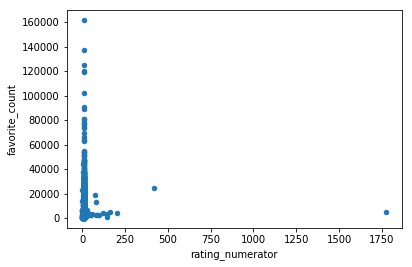

In [164]:
archive_clean.plot(x='rating_numerator', y='favorite_count', kind='scatter')

<function matplotlib.pyplot.show(*args, **kw)>

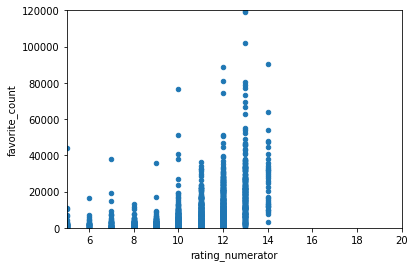

In [165]:
archive_clean.plot(x='rating_numerator', y='favorite_count', kind='scatter')
plt.axis([5, 20, 0, 120000])
plt.show

In [166]:
corr1 = corr, _ = pearsonr(archive_clean.rating_numerator, archive_clean.favorite_count)
print(corr1)

(0.015899280311798554, 0.47863479771688433)


##### Plot relationship between favorite_count and retweet_count
    Use basic plot to view all of the data
    Change axes to get a better view
    Calculate correlation coeffient and p-value
    
    The plot shows a strong positive correclation between favorite_count and retweet_count
    
    The correlation coefficient is very close to 1 and is positive, indicating a strog positive correlation between 
    favorite_count and retweet_count    

##### Code

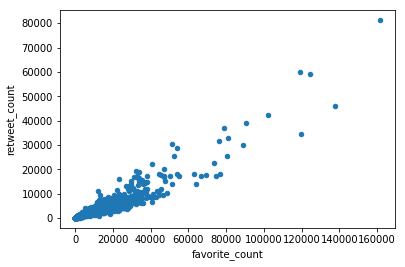

In [167]:
archive_clean.plot(x='favorite_count', y='retweet_count', kind='scatter')

<function matplotlib.pyplot.show(*args, **kw)>

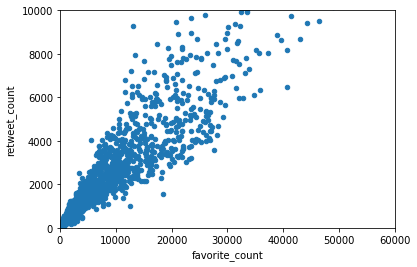

In [168]:
archive_clean.plot(x='favorite_count', y='retweet_count', kind='scatter')
plt.axis([0, 60000, 0, 10000])
plt.show

In [169]:
corr1 = corr, _ = pearsonr(archive_clean.favorite_count, archive_clean.retweet_count)
print(corr1)

(0.92937521928262778, 0.0)


In [170]:
archive_clean.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,37362,8037,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


##### Drop rows with no rating.

##### Code

In [171]:
archive_clean.dropna(subset=['rating_numerator'])

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,37362,8037,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None,32109,5966,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None,24216,3948,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,None,40660,8197,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,None,38882,8885,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10,None,None,19550,2956,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10,Jax,None,11416,1951,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,None,None,62984,17918,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10,Zoey,None,26887,4055,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10,Cassie,doggo,30816,6990,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


##### Test

In [172]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 17 columns):
tweet_id              1988 non-null int64
text                  1988 non-null object
rating_numerator      1988 non-null float64
rating_denominator    1988 non-null int64
name                  1988 non-null category
dog_type              1988 non-null category
favorite_count        1988 non-null int64
retweet_count         1988 non-null int64
p1                    1988 non-null category
p1_conf               1988 non-null float64
p1_dog                1988 non-null bool
p2                    1988 non-null category
p2_conf               1988 non-null float64
p2_dog                1988 non-null bool
p3                    1988 non-null category
p3_conf               1988 non-null float64
p3_dog                1988 non-null bool
dtypes: bool(3), category(5), float64(4), int64(4), object(1)
memory usage: 285.8+ KB


##### Remove rows in which the p1 prediction is not a type of dog.

##### Code

In [173]:
archive_clean = pred_clean[pred_clean.p1_dog]

##### Test

In [174]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 10 columns):
tweet_id    1532 non-null int64
p1          1532 non-null category
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null category
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null category
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1)
memory usage: 132.6 KB


##### Assess the number of each type of dog represented in the data. 
    This assumes that the first prediction of what kind of dog is in the image is correct.
    Calcluate the percentage of times the top 5 breeds of dogs in this list appear in the data frame    

##### Code

In [175]:
archive_clean.p1.value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                       89 
Chihuahua                      83 
pug                            57 
chow                           44 
Samoyed                        43 
toy_poodle                     39 
Pomeranian                     38 
malamute                       30 
cocker_spaniel                 30 
French_bulldog                 26 
miniature_pinscher             23 
Chesapeake_Bay_retriever       23 
Siberian_husky                 20 
German_shepherd                20 
Staffordshire_bullterrier      20 
Cardigan                       19 
beagle                         18 
Maltese_dog                    18 
Eskimo_dog                     18 
Shetland_sheepdog              18 
Lakeland_terrier               17 
Rottweiler                     17 
Shih-Tzu                       17 
kuvasz                         16 
Italian_greyhound              16 
Great_Pyrenees                 14 
West_Highland_white_

In [176]:
#Percent of dogs in the predicitons table that are golden retrievers
150/1532

0.097911227154047

In [177]:
#Percent of dogs in the predicitons table that are laborador retrievers
100/1532

0.06527415143603134

In [178]:
#Percent of dogs in the predicitons table that are pembrokes (corgi)
89/1532

0.058093994778067884

In [179]:
#Percent of dogs in the predicitons table that are chihuahas
83/1532

0.054177545691906005

In [180]:
#Percent of dogs in the predicitons table that are pugs
57/1532

0.03720626631853786

## Store

Store the cleaned dataframes. This step was saved until the end of the analysis to accomodate assessment and cleaning steps that take place during the analysis step.

In [181]:
archive_clean.to_csv('twitter_archive_master.csv')

Sources:
https://www.toptal.com/python/twitter-data-mining-using-python

https://gist.github.com/manuchandel/bc8a6ca4b1527b7594945e5091013905

https://stackoverflow.com/questions/48157921/saving-tweets-to-json-file-in-python-3-6

https://www.guru99.com/reading-and-writing-files-in-python.html

Multiple Stackoverflow searches for various answers